![taskmanagement](https://assets-global.website-files.com/6058ba87eec5713e5f80752a/6282f519081a58feae9b1fc4_Task-management-vs-project-management.jpeg)

# What are Scheduled Tasks?
  
Automated processes that can be set up to run at specified intervals or times.

![automation_meme](https://media.makeameme.org/created/i-was-told-1ba2690468.jpg)

# Use cases:

> **Data Management**: Scheduled tasks enable you to automate data management processes within your organization. You can schedule tasks to regularly update, synchronize, or clean up data, ensuring that your datasets are accurate, up to date, and consistent.

> **Workload Automation**: Scheduled tasks help streamline administrative workflows by automating routine tasks. This saves time and effort by eliminating the need for manual intervention in repetitive processes. For example, you can schedule tasks to automatically generate and deliver reports, update data sources, or perform data validation checks.

> **Timely Updates**: Some workflows require regular updates or synchronization with external systems or data sources. Scheduled tasks ensure that these updates occur at specified intervals, guaranteeing that your organization's data is always current and aligned with the latest information.

> **Resource Optimization**: By scheduling tasks during off-peak hours or non-business hours, you can optimize resource utilization within your ArcGIS Online organization. For example, you can schedule resource-intensive geoprocessing tasks to run overnight when server loads are lower, minimizing impact on performance during peak usage periods.

> **Proactive Maintenance**: Scheduled tasks can be used for proactive maintenance and monitoring of your ArcGIS Online environment. You can schedule tasks to periodically check for system health, monitor usage patterns, or perform backup operations to ensure the stability and reliability of your organization's resources.

# Demo: Create a Task

#### Establish a Connection

In [2]:
from arcgis.gis import GIS

gis = GIS(profile="your_online_profile")

## Get Task Management Class

In [3]:
# The task manager can be called from a property on the user object
task_manager = gis.users.me.tasks
task_manager

<User naubry_geosaurus Tasks>

### See current tasks

In [4]:
# get all tasks
tasks = task_manager.all

# print out task names
for task in tasks:
    print(task.properties["title"])

Generate_Analysis_Reports
My_UC_Task


### Create a Task for a Notebook

<Item title:"User_Storage_Notebook" type:Notebook owner:naubry_geosaurus>
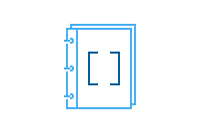

In [5]:
# Get a notebook
notebook_item = gis.content.search(
                "User_Storage_Notebook", item_type="Notebook"
            )[0]
notebook_item

In [6]:
# Create a task for the notebook
task = task_manager.create(
    title="Task_test",
    task_type="ExecuteNotebook",
    item=notebook_item,
    cron="2 2 2 2 ?",
)

In [7]:
task

<Task @ f71bd1fbba6c4221965bbc61669c7565>

In [8]:
task.properties

{'id': 'f71bd1fbba6c4221965bbc61669c7565', 'itemId': '8b8af7d438dd4463845c6b229dc7d072', 'type': 'ExecuteNotebook', 'title': 'Task_test', 'userId': 'naubry_geosaurus', 'cronSchedule': {'minute': '2', 'hour': '2', 'dayOfMonth': '2', 'month': '2', 'dayOfWeek': '?'}, 'runIntervalSeconds': 0, 'maxOccurrences': 10, 'created': 1689112736000, 'updated': 1689112736000, 'active': True, 'taskState': 'active'}

## Update the Task

In [9]:
task.update(title="My_UC2023_Task", cron="4 4 4 4 ?")

True

In [10]:
print(task.properties["title"])
print(task.properties["cronSchedule"])

My_UC2023_Task
{'minute': '4', 'hour': '4', 'dayOfMonth': '4', 'month': '4', 'dayOfWeek': '?'}


### Clean up

In [11]:
task.delete()

True

# Look at the Doc!
https://developers.arcgis.com/python/api-reference/arcgis.gis.tasks.html#taskmanager